<a href="https://colab.research.google.com/github/ManishEnishetty97/DeepLearning-HW1/blob/main/CNNpytorch_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch  # root package
import torchvision
from torch.utils.data import Dataset, DataLoader    
import torch.autograd as autograd       
from torch import Tensor                
import torch.nn as nn                   
import torch.nn.functional as F         
import torch.optim as optim             
from torch.jit import script, trace     
from torchvision import datasets, models, transforms    
import torchvision.transforms as transforms             

# Hyperparameters
num_epochs = 5
num_classes = 10
batch_size = 10
learning_rate = 0.001

DATA_PATH = '/Users/manish/dataset/'
MODEL_STORE_PATH = '/Users/manish/models'

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans,download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

class Manish(nn.Module):
    def __init__(self):
        super(Manish, self).__init__()
        self.manishlayer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.manishlayer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.manishlayer1(x)
        out = self.manishlayer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

model = Manish()



In [ ]:

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []



In [ ]:
for epoch in range(2):
    for i, data in enumerate(train_loader):
        images,labels=data
        outputs=model(images)
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))


            
            


Epoch [1/5], Step [100/6000], Loss: 0.8272, Accuracy: 70.00%
Epoch [1/5], Step [200/6000], Loss: 0.5766, Accuracy: 90.00%
Epoch [1/5], Step [300/6000], Loss: 0.2500, Accuracy: 100.00%
Epoch [1/5], Step [400/6000], Loss: 0.2965, Accuracy: 90.00%
Epoch [1/5], Step [500/6000], Loss: 0.5635, Accuracy: 90.00%
Epoch [1/5], Step [600/6000], Loss: 0.1903, Accuracy: 90.00%
Epoch [1/5], Step [700/6000], Loss: 0.0619, Accuracy: 100.00%
Epoch [1/5], Step [800/6000], Loss: 0.4707, Accuracy: 80.00%
Epoch [1/5], Step [900/6000], Loss: 0.6255, Accuracy: 80.00%
Epoch [1/5], Step [1000/6000], Loss: 1.6174, Accuracy: 70.00%
Epoch [1/5], Step [1100/6000], Loss: 0.0934, Accuracy: 90.00%
Epoch [1/5], Step [1200/6000], Loss: 0.4322, Accuracy: 90.00%
Epoch [1/5], Step [1300/6000], Loss: 0.0545, Accuracy: 100.00%
Epoch [1/5], Step [1400/6000], Loss: 0.0254, Accuracy: 100.00%
Epoch [1/5], Step [1500/6000], Loss: 0.1996, Accuracy: 90.00%
Epoch [1/5], Step [1600/6000], Loss: 0.1720, Accuracy: 90.00%
Epoch [1/5], 

In [ ]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

# Save the model and plot
torch.save(model.state_dict(), MODEL_STORE_PATH + 'conv_net_model.ckpt')

Test Accuracy of the model on the 10000 test images: 98.29 %


In [ ]:
valid_loss_list=[]
for images, labels in test_loader:
        output = model(images)
        loss = F.poisson_nll_loss(output,labels)
        valid_loss_list.append(loss.item())
        

Text(0, 0.5, 'Loss')

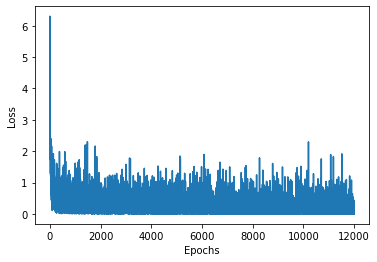

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')

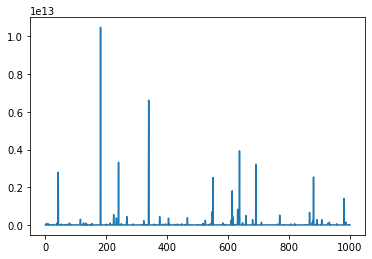

In [ ]:
plt.plot(valid_loss_list)

